In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from exp_a4 import A4Factory
from exp_a23 import A23Factory
import numpy as np
from qiskit.tools.visualization import circuit_drawer
%matplotlib inline

In [9]:
# number of qubits n, where size of the matrix is 2**n
n = 3
t = 1
# b entry of the matrices
b_4 = 2
b_2 = 3

In [16]:
#quantum register for the matrix
qr = QuantumRegister(n+1)
#ancilla qubits
qra = QuantumRegister(n-1)
cr = ClassicalRegister(2*n)
qc = QuantumCircuit(qr, qra, cr)


# V
k = 1 # V degenerates into H if k=1
theta = 2 * np.arcsin(1.0/np.sqrt(k+1))
qc.ry(theta, qr[n])
qc.barrier()

# TODO: substitute by suitable exp(iH_jt)

qc.barrier()
#1 controlled H_1 (here is exp_a4)
A4Factory(n).build_controlled(qc, qr, qr[n], qra, b_4*t)

qc.barrier()
#0 controlled H_2 (here is exp_a23)
qc.x(qr[n])
A23Factory(n).build_controlled(qc, qr, qr[n], qra, b_2*t)
qc.x(qr[n])

qc.barrier()
# V^dagger
qc.ry(-theta, qr[n])

In [17]:
# TODO: add some measurement

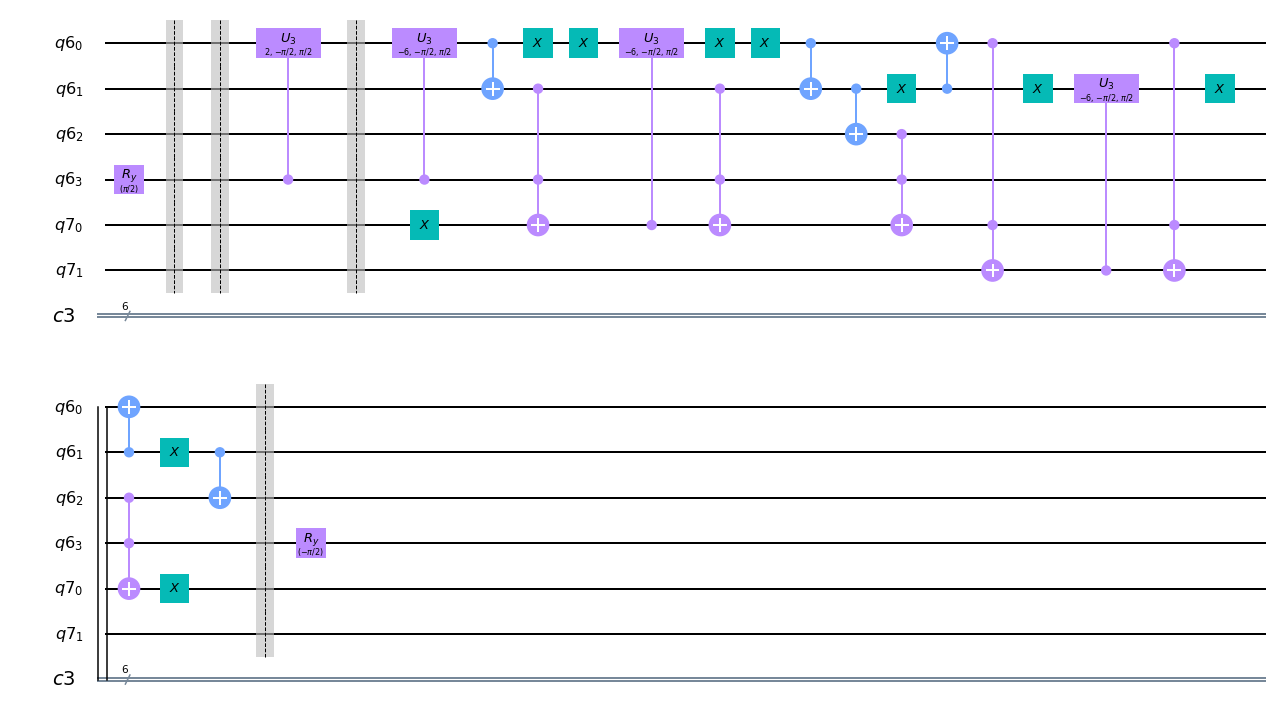

In [18]:
qc.draw(output='mpl')